[*********************100%%**********************]  1 of 1 completed

2024-08-17 03:01:54.000404
2004-08-17 03:01:54.000404



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


0.04409098905752986
0.09999705186806988
0.021787944043499853
0.05470458696236748
0.04691037456785035
0.10526080579230493
0.07172984309302194
0.12171406462016167
0.06394591563721144


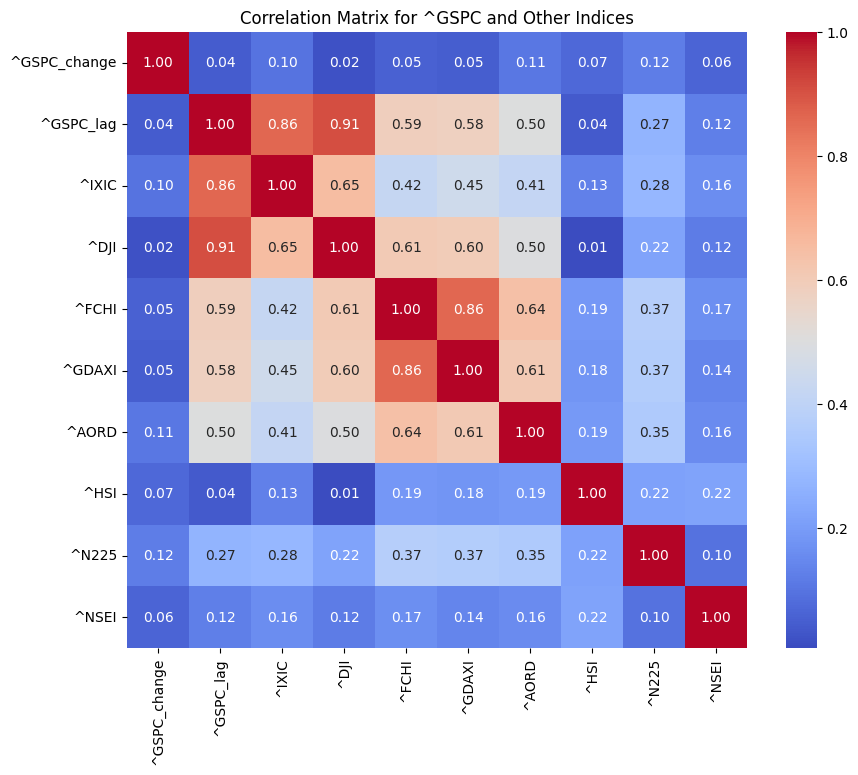

(51.42052124911951, 48.5325193707443)
(54.848555999060814, 45.10448462080301)
(50.55177271660014, 49.40126790326368)
(51.42052124911951, 48.5559990608124)
(51.678797839868515, 48.274242779995305)
(52.876262033341156, 46.959380136182205)
(53.46325428504344, 46.46630664475229)
(54.23808405729045, 45.71495656257337)
(53.5571730453158, 46.395867574548014)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


(3407, 6)
      ^GSPC_lag       ^IXIC       ^AORD        ^HSI       ^N225       ^NSEI
3467   7.700195   93.889648  -13.000000   17.000000   63.410156   53.150391
3468  17.479980   43.540039   39.500000  285.550781  -71.121094   21.000000
3469  10.449707   17.000000   -6.100098  -98.189453  -64.640625 -100.649414
3470   8.310059   91.380859   -7.799805 -297.791016 -114.830078  -59.049805
3471  -2.560059    0.659180   19.500000 -279.951172 -104.781250  -55.400391
...         ...         ...         ...         ...         ...         ...
4254  37.219727  157.121094   37.799805    8.669922 -247.339844   26.949219
4255  25.100098  151.099609   13.700195   13.849609  741.933594 -203.349609
4256  65.379883  282.900391   28.000000 -120.320312  -93.171875  -40.650391
4257  58.770020  166.898438   13.599609  100.929688  345.242188  -40.650391
4258  29.370117 -166.939453  106.100098  144.121094  757.742188  206.300781

[792 rows x 6 columns]
(3407, 1)
(792, 1)
torch.Size([3397, 10, 6])
torch.Siz

In [25]:
%run DataProcessing.ipynb

In [26]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

### Create DataLoader instances

In [36]:
train_dataset = TensorDataset(X_train_seq, y_train_seq)
test_dataset = TensorDataset(X_test_seq, y_test_seq)

train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

### Create LSTM class

In [28]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=6, hidden_size=50, num_layers=3, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Shape of each out:
        # (batch_size, sequence_length, hidden_size)
        outputs, _ = self.lstm(x)
        outputs = self.fc(outputs[:, -1, :])
        return outputs

# Instantiate the model
model = LSTMModel()

### Hyperparameter tuning
#### Uncomment the codes in this section to find the best hyperparameters again.

In [29]:
# param_grid = {
#     'hidden_size': [50, 100],
#     'num_layers': [1, 2, 3],
#     'lr': [0.001, 0.01]
# }

In [30]:
# Define Mean Absolute Percentage Error (MAPE) function
def get_mape(y_true, y_pred):
    if y_true.shape == y_pred.shape: 
        epsilon = 1e-8  # Small value to avoid division by zero
        percentage_error = torch.abs((y_true - y_pred) / (y_true + epsilon))
        
        # Calculate the mean of absolute percentage error
        mape = torch.mean(percentage_error)
        
        return mape.item()

In [31]:
# tscv = TimeSeriesSplit(n_splits = 5)

# best_mse = float('inf')
# best_mape = None
# best_params = None

In [35]:
# for params in ParameterGrid(param_grid):
#     hidden_size = params['hidden_size']
#     num_layers = params['num_layers']
#     lr = params['lr']

#     # Initialize the model, loss function and optimizer
#     # Define loss function and optimizer
#     model = LSTMModel(input_size=6, hidden_size=hidden_size, num_layers=num_layers)
#     criterion = nn.MSELoss() # Mean Squared Error
#     optimizer = optim.Adam(model.parameters(), lr = lr)

#     for train_idx, val_idx in tscv.split(X_train_seq):
#         # Split data into train and validation sets
#         X_train_cv, X_val_cv = X_train_seq[train_idx], X_train_seq[val_idx]
#         y_train_cv, y_val_cv = y_train_seq[train_idx], y_train_seq[val_idx]

#         # Create DataLoader for CV split
#         train_cv_loader = DataLoader(TensorDataset(X_train_cv, y_train_cv), batch_size=32, shuffle=False)
#         val_cv_loader = DataLoader(TensorDataset(X_val_cv, y_val_cv), batch_size=32, shuffle=False)
    
#     model.train()
#     num_epochs = 60
#     for epoch in range(num_epochs):
#         for X_batch, y_batch in train_cv_loader:
#             optimizer.zero_grad()
#             train_predictions = model(X_batch)
#             loss = criterion(train_predictions, y_batch)
#             loss.backward()
#             optimizer.step()

#     # Validate the model
#     model.eval()
#     val_mse = []
#     val_mape = []
#     with torch.no_grad():
#         for X_batch, y_batch in val_cv_loader:
#             val_predictions = model(X_batch)
#             mse = criterion(val_predictions, y_batch)
#             val_mse.append(mse.item())
#             val_mape.append(get_mape(y_batch, val_predictions))

#     # Calculate average validation MSE
#     avg_val_mse = sum(val_mse) / len(val_mse)
#     avg_val_mape = sum(val_mape) / len(val_mape)

#     # Update best parameters based on validation MSE
#     if avg_val_mse < best_mse:
#         best_mse = avg_val_mse
#         best_mape = avg_val_mape
#         best_params = params
    
#     print(f"Tested {params}, MSE: {avg_val_mse:.2f}, MAPE: {avg_val_mape:.2f}")

# print(f'Best Params: {best_params}, Best MSE: {best_mse:.2f}, Respective MAPE: {avg_val_mape:.2f}')


Tested {'hidden_size': 50, 'lr': 0.001, 'num_layers': 1}, MSE: 1655.06, MAPE: 4.84
Tested {'hidden_size': 50, 'lr': 0.001, 'num_layers': 2}, MSE: 1553.15, MAPE: 3.77
Tested {'hidden_size': 50, 'lr': 0.001, 'num_layers': 3}, MSE: 1658.04, MAPE: 4.42
Tested {'hidden_size': 50, 'lr': 0.01, 'num_layers': 1}, MSE: 1545.07, MAPE: 3.59
Tested {'hidden_size': 50, 'lr': 0.01, 'num_layers': 2}, MSE: 1629.23, MAPE: 3.70
Tested {'hidden_size': 50, 'lr': 0.01, 'num_layers': 3}, MSE: 1261.11, MAPE: 1.03
Tested {'hidden_size': 100, 'lr': 0.001, 'num_layers': 1}, MSE: 1792.16, MAPE: 4.31
Tested {'hidden_size': 100, 'lr': 0.001, 'num_layers': 2}, MSE: 1704.34, MAPE: 5.75
Tested {'hidden_size': 100, 'lr': 0.001, 'num_layers': 3}, MSE: 1347.60, MAPE: 2.62
Tested {'hidden_size': 100, 'lr': 0.01, 'num_layers': 1}, MSE: 1458.57, MAPE: 3.49
Tested {'hidden_size': 100, 'lr': 0.01, 'num_layers': 2}, MSE: 1260.32, MAPE: 1.06
Tested {'hidden_size': 100, 'lr': 0.01, 'num_layers': 3}, MSE: 1259.89, MAPE: 1.08
Best

### Final Model Training using the Best Parameters

In [38]:
model = LSTMModel(input_size=6, hidden_size=best_params['hidden_size'], num_layers=best_params['num_layers'], output_size=1)

optimizer = optim.Adam(model.parameters(), lr=best_params['lr'])
criterion = nn.MSELoss()

In [39]:
num_epochs = 60

model.train()

for epoch in range(num_epochs):
    # (Batch Size, Time Steps, Number of Features)
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad() 
        train_predictions = model(X_batch)
        mse = criterion(train_predictions, y_batch)
        mse.backward()
        optimizer.step()
    mape = get_mape(y_batch, train_predictions)
print(f'Epoch [{epoch + 1}/{num_epochs}], MSE: {mse.item():.2f}, MAPE: {mape:.2f}')

Epoch [60/60], MSE: 1221.19, MAPE: 1.03


### Model Evaluation

In [40]:
model.eval()

predictions = []
with torch.no_grad():
    test_mse = []
    test_mape = []
    for X_batch, y_batch in test_loader:
        test_predictions = model(X_batch)
        mse = criterion(test_predictions, y_batch)
        mape = get_mape(y_batch, test_predictions)
        predictions.append(test_predictions)
        test_mse.append(mse.item())
        test_mape.append(mape)
    
    average_test_mse = sum(test_mse) / len(test_mse)
    average_test_mape = sum(test_mape) / len(test_mape)
    print(f'Average MSE: {average_test_mse:.2f}, Average MAPE: {average_test_mape:.2f}')

Average MSE: 2072.54, Average MAPE: 1.14


In [41]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'model_state_dict.pth')